<a href="https://colab.research.google.com/github/bozhikov/SHE/blob/main/SHE_spectra_tools2022_by__sektor3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** ***SPECTRA DATA***# Новый раздел

---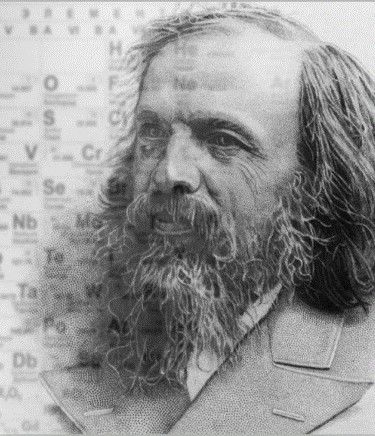



---



In [ ]:
#loading binary spectrometric file
#write the path
path='/content/sample_data/OCT144SM29.000'              
#open downloaded file using path
ab=open(path,'rb')
#read the current downloaded document
abv=ab.read()
#lenght of the read and downloaded file
len(abv)


In [ ]:
#block of splitting binary file into the patterns in accordance with Celnokov protocol
class input_file:
  #accesible attributes
  ID,Time,TTime,TTTime,TTTTime,F,A,FF,AA,FFF,AAA,FFFF,AAAA,Time_tot,Ftot,Atot=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
  #methods of initiliziation
  def  __init__(self,Currid_1byte,Time_hbyte,Time_lbyte,F_hbyte,F_lbyte,A_hbyte,A_lbyte):

       self.Currid=Currid_1byte
       self.ID.append(Currid_1byte)
       self.Time_hbyte=Time_hbyte
       self.Time.append(Time_hbyte)
       self.Time_lbyte=Time_lbyte
       self.Time.append(Time_lbyte)
       self.F_hbyte=F_hbyte
       self.F.append(F_hbyte)
       self.F_lbyte=F_lbyte
       self.F.append(F_lbyte)
       self.A_hbyte=A_hbyte
       self.A.append(A_hbyte)
       self.A_lbyte=A_lbyte
       self.A.append(A_lbyte)
   #convert from decimal to binary:
  def data_bin(self):
     for F in self.F:
       self.FF.append(bin(F))
     for A in self.A:
       self.AA.append(bin(A))
     for Time in self.Time:
       self.TTime.append(bin(Time))
 #convert from binary to string in order to stick data in position of time, fission, alpha items 
  def convertor(self):
    import string
    for i in range(len(self.FF)):
      self.FFF.append(str(self.FF[i]).lstrip('0b'))
    for j in range(len(self.AA)):
      self.AAA.append(str(self.AA[j]).lstrip('0b'))
    for k in range(len(self.TTime)):
      self.TTTime.append(str(self.TTime[k]).lstrip('0b'))
    for FFF in self.FFF:
      self.FFFF.append(FFF.zfill(8))
    for AAA in self.AAA: 
      self.AAAA.append(AAA.zfill(8))
    for TTTime in self.TTTime:
      self.TTTTime.append(TTTime.zfill(8))
  #return to binary 
  def total_join_data(self):
    for l in range(0,len(self.FFFF)-1,2):
      self.Ftot.append(self.FFFF[l]+self.FFFF[l+1])
    for m in range(0,len(self.AAAA)-1,2):
      self.Atot.append(self.AAAA[m]+self.AAAA[m+1])
    for n in range(0,len(self.TTTTime)-1,2):
      self.Time_tot.append(self.TTTTime[n]+self.TTTTime[n+1])

In [ ]:
#loading opened input binary file into this class
for i in range(0,(len(abv)),8):
  s=input_file(abv[i],abv[i+3],abv[i+2],abv[i+5],abv[i+4],abv[i+7],abv[i+6])

In [ ]:
#call method data_bin
s.data_bin()

In [ ]:
#call method convertor
s.convertor()

In [ ]:
#call method join_data
s.total_join_data()

In [ ]:
#spliting into the final items:number of strip, time, energy of alpha and fission 
class Spectroscopy_Data():
  ID_,Time_,N_Strip,E_Fis,E_alfa,Time_abs,ID_beam,beam,number_counter,ID_corr,E_alfa_corr,Time_abs_corr,beam_time,Time_E_corr=[],[],[],[],[],[],[],[],[],[],[],[],[],[]

  def __init__(self,ID,Time,Ftot,Atot):


      self.ID=ID
      self.ID_.append(ID)
      self.Time=Time
      value_time=int(Time,2)
      self.Time_.append(value_time)
      self.Ftot=Ftot
      value1_Ftot=int(Ftot[0:4],2)
      value2_Ftot=int(Ftot[5:16],2)
      self.N_Strip.append(value1_Ftot)
      self.E_Fis.append(value2_Ftot)
      self.Atot=Atot
      value1_E_alfa=int(Atot[5:16],2)
      value2_E_alfa=int(Atot[7:16],2)
      self.E_alfa.append(value1_E_alfa)
      self.ID_beam.append(value2_E_alfa)

      #global time
      def Time_setings(self):
       w=0
       c=-1
       for ID_ in self.ID_:
            c=c+1   
            if (ID_ ==10):
              w=w+1
              value_temtime= self.Time_[c]+w*65536
              self.Time_abs.append(value_temtime)

            else:
                self.Time_abs.append(self.Time_[c]+w*65536)
      #call beam status
      def beam_status(self):
    
        beam_count=-1
        for ID_ in self.ID_:
          beam_count=beam_count+1
          if ( ID_==9):
             self.beam.append(self.ID_beam[beam_count])
             self.beam_time.append(self.Time_abs[beam_count])
       #choice of certain ID
      def Data_final_corr(self):
         b=-1
    
         for ID_ in self.ID_:
            b=b+1
            if (ID_==1):
              self.ID_corr.append(self.ID_[b])
              self.Time_abs_corr.append(self.Time_abs[b])
              self.E_alfa_corr.append(self.E_alfa[b])
      
      #choice of energy range
      def flow_energy_selection(self,ch_1,ch_2): 
        self.ch_1=ch_1
        self.ch_2=ch_2
        cc=-1           
        for E_alfa_corr in range(len(self.E_alfa_corr)):
         cc=cc+1
         if (self.E_alfa_corr[cc]>=ch_1) and (self.E_alfa_corr[cc]<=ch_2) and (self.N_Strip[cc]==0):
          self.number_counter.append(1)
          self.Time_E_corr.append(self.Time_abs_corr[cc])



In [ ]:
#loading objects of Input_file class into Spectroscopy_Data class
for q in range(0,len(s.ID),1):
  zy=Spectroscopy_Data(s.ID[q],s.Time_tot[q],s.Ftot[q],s.Atot[q])

In [ ]:
#clean accesible attributes of input_file class (recommended before new initilization)
zy.ID_,zy.Time_,zy.N_Strip,zy.E_Fis,zy.E_alfa,zy.Time_abs,zy.ID_beam,zy.beam,zy.Time_E_corr,zy.number_counter,zy.ID_corr,zy.E_alfa_corr,zy.Time_abs_corr=0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
#call global time
zy.Time_setings()

In [ ]:
#call beam status
zy.beam_status()

In [ ]:
#call to show certain ID
zy.Data_final_corr()

In [ ]:
#call to fine counts in certain energy range 'example' self.flow_energy_selection(left border channel,right border channel)
zy.flow_energy_selection(1979,2013)

In [ ]:
#dealing with Spectroscopy_Data class specially for counting alpha in chosen above energy range
class data_tools():
  #list of output tupple attributes
  number_time,Beam_Time,list_counter,bb=[],[],[],[]
  
  #input number of alpha counts (as one digit)in chosen energy range in respective time
  def __init__(self,*number_counter):
    
    self.number_counter=number_counter
    self.number_time.append(number_counter)
    #self.Time_of_E_corr=Time_of_E_corr
  
  #time filter (time interval begins after beam on/off )
  def flow_time_determination_1(self,delta_t):
    self.delta_t=delta_t

  #input data for beam status
  def flow_time_determination_2(self,*beam):
    self.beam=beam
    self.Beam_Time.append(beam)
    
    for b in range(len(self.Beam_Time[0][0])):

      self.bb.append(b)
      
      if (self.Beam_Time[0][0][b]==1):
        
        temp_time =self.Beam_Time[0][1][b]+self.delta_t
       
        Ncb=sum( self.number_time[0][0][ccc] for ccc in range(len(self. number_time[0][0])) if  (self.Beam_Time[0][1][b]<self.number_time[0][1][ccc]) and (self.number_time[0][1][ccc]<=temp_time))
        self.list_counter.append(Ncb)

In [ ]:
#call of data_tools class
zyy=data_tools(zy.number_counter,zy.Time_E_corr)

In [ ]:
#set time filter self.flow_time_determination_1(delta_t)
zyy.flow_time_determination_1(5000000)

In [ ]:
#set beam status
zyy.flow_time_determination_2(zy.beam,zy.beam_time)

In [ ]:
#assuming 
indep_178Hg5s=zyy.list_counter

In [ ]:
#clean
zyy.number_time,zyy.beam_time,zyy.list_counter,zyy.bb=0,0,0,0

In [ ]:
#change type to Series type
import numpy as np
import pandas as pd
data1 = pd.Series(indep_178Hg5s)
data2 = pd.Series(indep_180Hg1s)
data3 = pd.Series(indep_179Hg1s)

In [ ]:
#calculate mean for self-checking
from pandas.core.arrays.datetimelike import pd_array
f1=pd_array(data1)
f1
aver=f1.mean()
aver

In [ ]:
#connect with personal data in drive storage
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#create excel file
import openpyxl
wbnew = openpyxl.Workbook()
Sheet_1 = wbnew.sheetnames
wbnew.save(filename='/content/sample_data/178Hg.xlsx')

In [ ]:
#create multiple list
columns=['1 sec','2 sec','5 sec']
df= pd.DataFrame(list(zip(data1,data2,data3)),columns=columns)
#watch the table
print(df)

In [ ]:
#write in special sheet in excel file without row index 
with pd.ExcelWriter('/content/sample_data/178Hg.xlsx',mode='a') as writer:  
    df.to_excel(writer, sheet_name='time filters',index=False)